![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Pesquisa Operacional

## Lista 3
- Aluno: Lucas Mateus Fernandes
- RA:0035411



---
### Importação de bibliotecas 

In [ ]:
#instalação pulp
!pip3 install pulp
!pip3 install matplot

In [3]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
%matplotlib inline

In [4]:
import matplotlib        as mpl
cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

def plot_raizes(list_obj, list_par = None, xlabel=None, ylabel=None):
    if(list_par == None):
        aran = np.arange(0,len(list_obj),1)
    else:
        aran = list_par.copy()

    plt.rcParams["figure.figsize"] = (10,8)
    plt.scatter(aran, list_obj, c=aran, cmap=cmap)

    if(xlabel == None and ylabel == None):
        cbar = plt.colorbar()
        cbar.set_label('Função Objetivo')

    plt.xlabel('Valores parâmetro' if xlabel == None else xlabel)
    plt.ylabel('Função Objetivo' if ylabel == None else ylabel)

    plt.grid()
    plt.show()

---
### [A-01]

Solucionar computacionalmente os exercícios de 1 a 4 da Seção A da Lista de Exercícios
02, em Python, usando a biblioteca SciPy.

#### Lista 2  [A-01]

Modelagem:

$$ max~z = 12 * qtdcarrinho + 60 * qtdTriciclo $$

suj. a
$$ Processo de usinagem $$
$$ 15*qtdCarrinho + 30 * qtdTriciclo \le 2160 $$

$$ Processo de pintura $$
$$ 6*qtdCarrinho + 45 * qtdTriciclo \le 1320 $$

$$ Processo de montagem $$
$$ 6*qtdCarrinho + 24 * qtdTriciclo \le 900 $$



Modelagem Adaptada:

$$ min~ -z = -12 * qtdcarrinho - 60 * qtdTriciclo $$
suj. a
$$ Processo de usinagem $$
$$ 15*qtdCarrinho + 30 * qtdTriciclo \le 2160 $$

$$ Processo de pintura $$
$$ 6*qtdCarrinho + 45 * qtdTriciclo \le 1320 $$

$$ Processo de montagem $$
$$ 6*qtdCarrinho + 24 * qtdTriciclo \le 900 $$



In [3]:
#função objetivo (x, y)
f_objetivo = [-12, -60] #c

#inequações do lado esquerdo (left-hand side) - matriz A
A_ineq = [[ 15,  30],  #restrição 1
          [6,  45],  #restrição 2
          [ 6, 24]]  #restrição 3

#inequações do lado direito (right-hand side) - matriz b
b_ineq = [2160, 1320, 900] #restrições 1, 2 e 3

#intervalo (restrições de não negatividade)
intervalo = [(0, float("inf")), #intervalo de x (0-inf)
            (0, float("inf"))]  #intervalo de y (0-inf)

#solver
result = opt.linprog(c=f_objetivo, A_ub=A_ineq, b_ub=b_ineq, bounds=intervalo, method="simplex")

#resultado do método de otimização
print('qtdCarrinho={0:.2f}\nqtdTriciclo={1:.2f}'.format(result.x[0], result.x[1]))
print('Lucro =', -result.fun)

qtdCarrinho=70.00
qtdTriciclo=20.00
Lucro = 2040.0


---

#### Lista 2  [A-02]

Modelagem:
$$ max~z = 80 * A + 60 * B $$

suj. a
$$ 4*A + 6*B * B \le 24 $$
$$ 4*A + 2 * B \le 16 $$
$$ B \le 3 $$

Modelagem Adaptada:
$$ min~-z = -80 * A - 60 * B $$

suj. a
$$ 4*A + 6*B * B \le 24 $$
$$ 4*A + 2 * B \le 16 $$
$$ B \le 3 $$


In [4]:
#função objetivo (x, y)
f_objetivo = [-80, -60]

#inequações do lado esquerdo (left-hand side) - matriz A
A_ineq = [[ 4,  6],  #restrição 1
          [ 4,  2],  #restrição 2
          [ 0,  1]]  #restrição 3

#inequações do lado direito (right-hand side) - matriz b
b_ineq = [24, 16, 3] #restrições 1, 2 e 3

#intervalo (restrições de não negatividade)
intervalo = [(0, float("inf")), #intervalo de x (0-inf)
            (0, float("inf"))]  #intervalo de y (0-inf)

#solver
result = opt.linprog(c=f_objetivo, A_ub=A_ineq, b_ub=b_ineq, 
                    bounds=intervalo, method="simplex")

#resultado do método de otimização

print('A= %.2f' % result.x[0])
print('B= %.2f' % result.x[1])
print('max= %.2f' % (result.fun*(-1)))

A= 3.00
B= 2.00
max= 360.00


#### Lista 2  [A-03]

Modelagem:

x_1 = Carne  ;  x_2 = Ovo  

$$ min~z = 3 * x_1 + 2.5 * x_2 $$

suj. a
$$ 4*x_1 + 8 * x_2 \ge 32 $$
$$ 6*x_1 + 6 * x_2 \ge 36 $$


Modelagem Adaptada:

$$ min~z = 3 * x_1 + 2.5 * x_2 $$

suj. a
$$ -4*x_1 - 8 * x_2 \le -32 $$
$$ -6*x_1 - 6 * x_2 \le -36 $$


In [5]:
#função objetivo (x, y)
f_objetivo = [3, 2.5]

#inequações do lado esquerdo (left-hand side) - matriz A
A_ineq = [[ -4,  -8],  #restrição 1
          [ -6,  -6]]  #restrição 2

#inequações do lado direito (right-hand side) - matriz b
b_ineq = [-32, -36] #restrições 1, 2 

#intervalo (restrições de não negatividade)
intervalo = [(0, float("inf")), #intervalo de x (0-inf)
            (0, float("inf"))]  #intervalo de y (0-inf)

#solver
result = opt.linprog(c=f_objetivo, A_ub=A_ineq, b_ub=b_ineq, 
                    bounds=intervalo, method="simplex")

#resultado do método de otimização

print('x1= %.2f' % result.x[0])
print('x2= %.2f' % result.x[1])
print('max= %.2f' % (result.fun*(-1)))

x1= 0.00
x2= 6.00
max= -15.00


#### Lista 2  [A-04]

Modelagem:

x1 = natação; x2 = ciclismo

$$ max~z = x_1 + x_2 $$

suj. a
$$ 3*x_1 + 2 * x_2 \le 50 $$
$$ 2*x_1 + 2 * x_2 \le 20 $$


Modelagem Adaptada:

$$ min~-z = -x_1 - x_2 $$

suj. a
$$ 3*x_1 + 2 * x_2 \le 50 $$
$$ 2*x_1 + 2 * x_2 \le 20 $$


In [6]:
#função objetivo (x, y)
f_objetivo = [-1, -1]

#inequações do lado esquerdo (left-hand side) - matriz A
A_ineq = [[ 3,  2],  #restrição 1
          [ 2,  2]]  #restrição 2

#inequações do lado direito (right-hand side) - matriz b
b_ineq = [50, 20] #restrições 1, 2 

#intervalo (restrições de não negatividade)
intervalo = [(0, float("inf")), #intervalo de x (0-inf)
            (0, float("inf"))]  #intervalo de y (0-inf)

#solver
result = opt.linprog(c=f_objetivo, A_ub=A_ineq, b_ub=b_ineq, 
                    bounds=intervalo, method="simplex")

#resultado do método de otimização

print('x1= %.2f' % result.x[0])
print('x2= %.2f' % result.x[1])
print('max= %.2f' % (result.fun*(-1)))

x1= 10.00
x2= 0.00
max= 10.00


---
### [A-02] 
Solucionar computacionalmente os exercícios de 1 a 4 da Seção B da Lista de Exercícios
02, em Python, usando a biblioteca PulP.

#### Lista 2  [A-01]

Modelagem:

$$ max~z = 12 * qtdcarrinho + 60 * qtdTriciclo $$

suj. a
$$ Processo de usinagem $$
$$ 15*qtdCarrinho + 30 * qtdTriciclo \le 2160 $$

$$ Processo de pintura $$
$$ 6*qtdCarrinho + 45 * qtdTriciclo \le 1320 $$

$$ Processo de montagem $$
$$ 6*qtdCarrinho + 24 * qtdTriciclo \le 900 $$



In [55]:
#inicia um problema de programação linear (LP)
model = LpProblem(name="[A-01]", sense=LpMaximize)

# inicializa as variáveis de decisão
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

# adiciona as constraints ao modelo
model += (15*x+30*y <= 2160, "restricao_1")
model += (6*x+45*y <= 1320, "restricao_2")
model += (6*x+24*y <= 900, "restricao_3")

# adiciona a função objetivo
obj_func = 12*x + 60 * y
model += obj_func

In [56]:
#resolve o modelo
model.solve()

#status da execução
print("status",LpStatus[model.status], "\n")

#função objetivo
print("max",model.objective.value())

#variáveis
for var in model.variables():
    print(var.name, "=", var.value())

#restrições
print()
for name, constraint in model.constraints.items():
    print(name, "=", constraint.value())

status Optimal 

max 2040.0
x = 70.0
y = 20.0

restricao_1 = -510.0
restricao_2 = 0.0
restricao_3 = 0.0


#### Lista 2  [A-02]

Modelagem:
$$ max~z = 80 * A + 60 * B $$

suj. a
$$ 4*A + 6*B * B \le 24 $$
$$ 6*A + 2 * B \le 16 $$
$$ B \le 3 $$

In [58]:
#inicia um problema de programação linear (LP)
model = LpProblem(name="[A-02]", sense=LpMaximize)

# inicializa as variáveis de decisão
x = LpVariable(name="A", lowBound=0)
y = LpVariable(name="B", lowBound=0)

# adiciona as constraints ao modelo
model += (4*x+6*y <= 24, "restricao_1")
model += (4*x+2*y <= 16, "restricao_2")
model += (y <= 3, "restricao_3")

# adiciona a função objetivo
obj_func = 80*x + 60 * y
model += obj_func

In [59]:
#resolve o modelo
model.solve()

#status da execução
print("status",LpStatus[model.status], "\n")

#função objetivo
print("max",model.objective.value())

#variáveis
for var in model.variables():
    print(var.name, "=", var.value())

#restrições
print()
for name, constraint in model.constraints.items():
    print(name, "=", constraint.value())

status Optimal 

max 360.0
A = 3.0
B = 2.0

restricao_1 = 0.0
restricao_2 = 0.0
restricao_3 = -1.0


#### Lista 2  [A-03]

Modelagem:

x_1 = Carne  ;  x_2 = Ovo  

$$ min~z = 3 * x_1 + 2.5 * x_2 $$

suj. a
$$ 4*x_1 + 8 * x_2 \ge 32 $$
$$ 6*x_1 + 6 * x_2 \ge 36 $$


In [65]:
#inicia um problema de programação linear (LP)
model = LpProblem(name="[A-03]", sense=LpMinimize)

# inicializa as variáveis de decisão
x = LpVariable(name="x1", lowBound=0)
y = LpVariable(name="x2", lowBound=0)

# adiciona as constraints ao modelo
model += (4*x+8*y >= 32, "restricao_1")
model += (6*x+6*y >= 36, "restricao_2")

# adiciona a função objetivo
obj_func = 3*x + 2.5 * y
model += obj_func

In [66]:
#resolve o modelo
model.solve()

#status da execução
print("status",LpStatus[model.status], "\n")

#função objetivo
print("max",model.objective.value())

#variáveis
for var in model.variables():
    print(var.name, "=", var.value())

#restrições
print()
for name, constraint in model.constraints.items():
    print(name, "=", constraint.value())

status Optimal 

max 15.0
x1 = 0.0
x2 = 6.0

restricao_1 = 16.0
restricao_2 = 0.0


#### Lista 2  [A-04]

Modelagem:

x1 = natação; x2 = ciclismo

$$ max~z = x_1 + x_2 $$

suj. a
$$ 3*x_1 + 2 * x_2 \le 50 $$
$$ 2*x_1 + 2 * x_2 \le 20 $$

In [68]:
#inicia um problema de programação linear (LP)
model = LpProblem(name="[A-04]", sense=LpMaximize)

# inicializa as variáveis de decisão
x = LpVariable(name="x1", lowBound=0)
y = LpVariable(name="x2", lowBound=0)

# adiciona as constraints ao modelo
model += (3*x+2*y <= 50, "restricao_1")
model += (2*x+2*y <= 20, "restricao_2")

# adiciona a função objetivo
obj_func = x + y
model += obj_func


In [69]:
#resolve o modelo
model.solve()

#status da execução
print("status",LpStatus[model.status], "\n")

#função objetivo
print("max",model.objective.value())

#variáveis
for var in model.variables():
    print(var.name, "=", var.value())

#restrições
print()
for name, constraint in model.constraints.items():
    print(name, "=", constraint.value())

status Optimal 

max 10.0
x1 = 0.0
x2 = 10.0

restricao_1 = -30.0
restricao_2 = 0.0


---
#### [B-01]

Modelagem:

x1 = chinelo; x2 = tamanco

$$ max~z = 15*x_1 + 20*x_2 $$

suj. a
$$ 5*x_1 + 4*x_2 \le 240 $$
$$ 4*x_1 + 8*x_2 \le 360 $$
$$ 0*x_1 + 7.5*x_2 \le 300 $$

#### [B-01] a)

In [77]:
#inicia um problema de programação linear (LP)
model = LpProblem(name="[B-01]a)", sense=LpMaximize)

# inicializa as variáveis de decisão
x = LpVariable(name="chinelo", lowBound=0)
y = LpVariable(name="tamanco", lowBound=0)

# adiciona as constraints ao modelo
model += (5*x+4*y <= 240, "restricao_1")
model += (4*x+8*y <= 360, "restricao_2")
model += (7.5*y <= 300, "restricao_3")

# adiciona a função objetivo
obj_func = 15*x + 20*y
model += obj_func

#resolve o modelo
model.solve()

#status da execução
print("status",LpStatus[model.status], "\n")

#função objetivo
print("max",model.objective.value())

#variáveis
for var in model.variables():
    print(var.name, "=", var.value())

#restrições
print()
for name, constraint in model.constraints.items():
    print(name, "=", constraint.value())

status Optimal 

max 1000.0
chinelo = 20.0
tamanco = 35.0

restricao_1 = 0.0
restricao_2 = 0.0
restricao_3 = -37.5


#### [B-01] f)

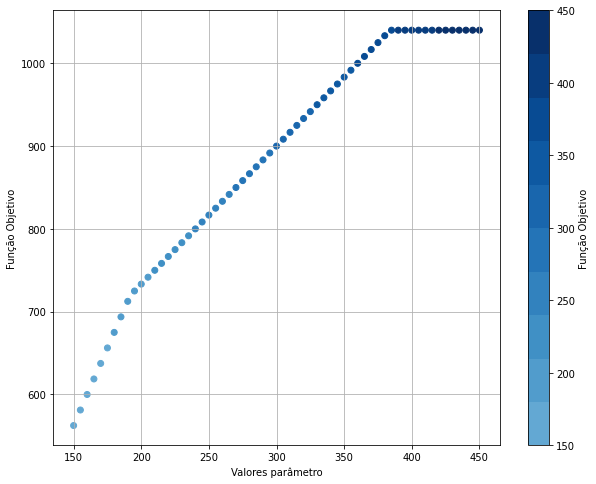

In [28]:
listaObj = []
lsitaRange = []
for i in range(150,451,5):
    novoLimite=int(i);
    #inicia um problema de programação linear (LP)
    model = LpProblem(name="[B-01]f)", sense=LpMaximize)
    # inicializa as variáveis de decisão
    x = LpVariable(name="chinelo", lowBound=0)
    y = LpVariable(name="tamanco", lowBound=0)
    # adiciona as constraints ao modelo
    model += (5*x+4*y <= 240, "restricao_1")
    model += (4*x+8*y <= novoLimite, "restricao_2")
    model += (7.5*y <= 300, "restricao_3")
    # adiciona a função objetivo
    obj_func = 15*x + 20*y
    model += obj_func
    #resolve o modelo
    model.solve()
    #função objetivo
    valor = model.objective.value()
    listaObj.append(valor)
    lsitaRange.append(novoLimite)

plot_raizes(listaObj, list_par = lsitaRange, xlabel=None, ylabel=None)
   

#### [B-01] g)

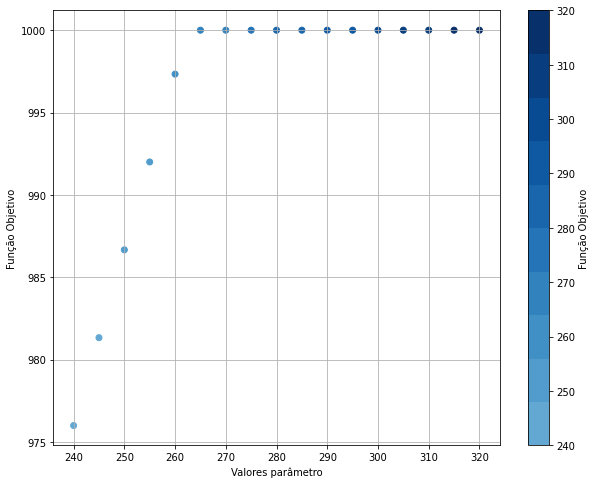

In [33]:
listaObj = []
lsitaRange = []
for i in range(240,321,5):
    novoLimite=int(i);
    #inicia um problema de programação linear (LP)
    model = LpProblem(name="[B-01]g)", sense=LpMaximize)
    # inicializa as variáveis de decisão
    x = LpVariable(name="chinelo", lowBound=0)
    y = LpVariable(name="tamanco", lowBound=0)
    # adiciona as constraints ao modelo
    model += (5*x+4*y <= 240, "restricao_1")
    model += (4*x+8*y <= 360, "restricao_2")
    model += (7.5*y <= novoLimite, "restricao_3")
    # adiciona a função objetivo
    obj_func = 15*x + 20*y
    model += obj_func
    #resolve o modelo
    model.solve()
    #função objetivo
    valor = model.objective.value()
    listaObj.append(valor)
    lsitaRange.append(novoLimite)

plot_raizes(listaObj, list_par = lsitaRange, xlabel=None, ylabel=None)
   